# Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

# Reading the CSV file and creating a Dataframe

In [2]:
file_path = './movie_dataset.csv'
movies = pd.read_csv(file_path)
# movies.head()

Getting all the movies where the vote_count is below or equals to 500

In [3]:
# movies.loc[movies.vote_count <= 500]

See the number of NaN's in each column

In [4]:
movies.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

# Checking and playing with the data

In [5]:
movies_v1 = movies.loc[movies.revenue > 0 ,['revenue', 'director', 'runtime']]
# valid_movies.isna().sum()
movies_v2 = movies_v1.dropna(subset=['director'])
# valid_movies
movies_v2

,revenue,director,runtime
0,2787965087,James Cameron,162.0
1,961000000,Gore Verbinski,169.0
2,880674609,Sam Mendes,148.0
3,1084939099,Christopher Nolan,165.0
4,284139100,Andrew Stanton,132.0
...,...,...,...
4775,76901,Andrew Bujalski,85.0
4788,6000000,John Waters,93.0
4792,99000,Kiyoshi Kurosawa,111.0
4796,424760,Shane Carruth,77.0


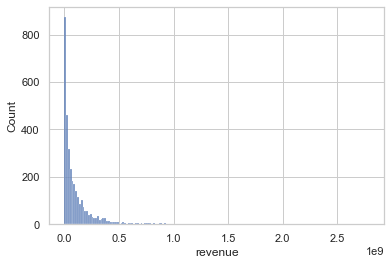

In [6]:
sns.histplot(data=movies_v2, x="revenue")
plt.show()

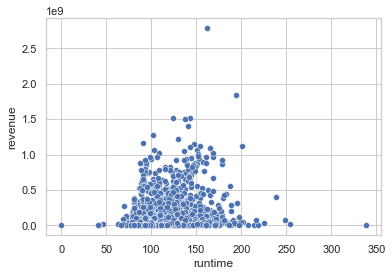

In [7]:
sns.scatterplot(data=movies_v2, x="runtime", y="revenue")
plt.show()

In [8]:
movies_zero_runtime = movies.loc[movies.runtime == 0]
movies_zero_runtime['id'].count()

35

# --------------- Try 2 ---------------

In this section we remove all the movies with vote_count below 100

In [9]:
labels = []
threshold = 7
for i in movies['vote_average']:
    labels.append(1) if i >= threshold else labels.append(-1)
movies['label'] = labels
movies_v2 = movies.loc[(movies.vote_count >= 100), ['runtime', 'label']]
movies_v2

,runtime,label
0,162.0,1
1,169.0,-1
2,148.0,-1
3,165.0,1
4,132.0,-1
...,...,...
4773,92.0,1
4778,85.0,-1
4788,93.0,-1
4796,77.0,-1


***Using SVM***

In [10]:
X_train, X_test, y_train, y_test = train_test_split(movies_v2[['runtime']], movies_v2['label'], test_size=0.1, random_state=0)

In [11]:
svm_ = svm.SVC(C=1, random_state=0)
svm_.fit(X_train, y_train)
svm_.score(X_test, y_test)

0.8233438485804416

Accuracy: 0.8233438485804416
Precision: 0.7111419508326724
Recall: 0.6035992217898833
F1-score: 0.6233237141402139


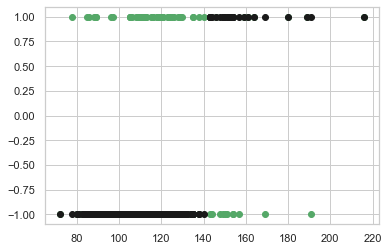

In [12]:
y_pred = svm_.predict(X_test)

plt.scatter(X_test['runtime'], y_test,color='g') 

plt.scatter(X_test['runtime'], y_pred,color='k') 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

***Using Perceptron algortithm***

In [13]:
perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train, y_train)
perceptron.score(X_test, y_test)

0.8107255520504731

Accuracy: 0.8107255520504731
Precision: 0.40536277602523657
Recall: 0.5
F1-score: 0.4477351916376307


C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


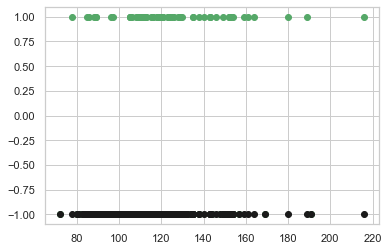

In [14]:
y_pred = perceptron.predict(X_test)

plt.scatter(X_test['runtime'], y_test,color='g') 

plt.scatter(X_test['runtime'], y_pred,color='k') 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# --------------- Try 3 ---------------

In this section we try other Kernel in the SVM model, also removing movies with less than 1M in the revenue, it reduce drastically the amount of movies.

In [16]:
labels = []
threshold = 7
for i in movies['vote_average']:
    labels.append(1) if i >= threshold else labels.append(-1)
movies['label'] = labels
movies_v3 = movies.loc[(movies.revenue >= 1000000) & (movies.vote_count >= 100), ['runtime', 'label']]
movies_v3

,runtime,label
0,162.0,1
1,169.0,-1
2,148.0,-1
3,165.0,1
4,132.0,-1
...,...,...
4738,84.0,1
4742,100.0,-1
4773,92.0,1
4788,93.0,-1


# Implementation of SVM
https://towardsdatascience.com/get-into-shape-14637fe1cd32

In [17]:
X_train, X_test, y_train, y_test = train_test_split(movies_v3[['runtime']], movies_v3['label'], test_size=0.1, random_state=0)

In [18]:
# svm_ = svm.SVC(kernel='linear', C=1, random_state=42)
svm_ = svm.SVC(C=1, random_state=42)
svm_.fit(X_train, y_train)
svm_.score(X_test, y_test)

0.7664233576642335

Accuracy: 0.7664233576642335
Precision: 0.6947860730989087
Recall: 0.5794980558501237
F1-score: 0.581998474446987


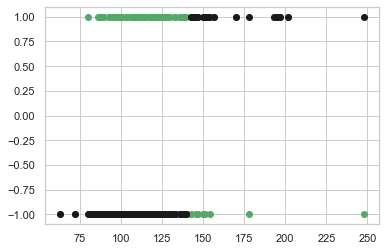

In [19]:
y_pred = svm_.predict(X_test)

plt.scatter(X_test['runtime'], y_test,color='g') 

plt.scatter(X_test['runtime'], y_pred,color='k') 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Implementation using Perceptron algorithm

In [20]:
perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train, y_train)
perceptron.score(X_test, y_test)

0.7481751824817519

Accuracy: 0.7481751824817519
Precision: 0.3740875912408759
Recall: 0.5
F1-score: 0.4279749478079332


C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


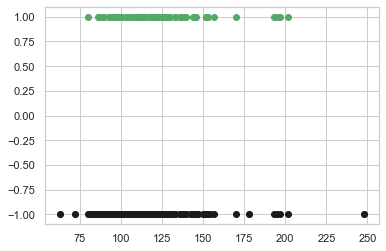

In [21]:
y_pred = perceptron.predict(X_test)

plt.scatter(X_test['runtime'], y_test,color='g') 

plt.scatter(X_test['runtime'], y_pred,color='k') 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [22]:
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

          -1       0.75      1.00      0.86       205

   micro avg       0.75      1.00      0.86       205
   macro avg       0.75      1.00      0.86       205
weighted avg       0.75      1.00      0.86       205



# --------------- Try 4 ---------------

In this section we try multiple features

In the next cell we can see that the number of movies where the number of ratings are larger than 100 and have a revenue bigger than 200M$ dollars is 564.

In [27]:
movies_v4 = movies.loc[(movies.revenue > 200000000) & (movies.vote_count > 100), ['runtime', 'vote_average', 'vote_count']]
movies_v4

,runtime,vote_average,vote_count
0,162.0,7.2,11800
1,169.0,6.9,4500
2,148.0,6.3,4466
3,165.0,7.6,9106
4,132.0,6.1,2124
...,...,...,...
3696,117.0,6.6,632
3813,238.0,7.7,970
3824,91.0,6.8,363
4441,70.0,6.8,1405


# Implementation of SVM 

Need to run the movies_v4 box
On the dataset to determine if a movie was "successfull" or not

In [28]:
# First we need to create the labels, our threshold for successfull movie is: 7
threshold = 7
y = []
for i in movies_v4['vote_average']:
    y.append(1) if i >= threshold else y.append(-1)

Splitting the data int two sets, 1 for training and the other for the test

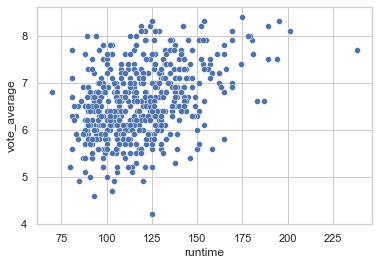

In [25]:
X_train, X_test, y_train, y_test = train_test_split(movies_v4, y, test_size=0.1, random_state=0)

sns.scatterplot(data=X_train, x='runtime', y='vote_average')

plt.show()

As we can see there is no rating above 8.5, the data set is very limited.

It seems that longer movies have higher ratings.

# Running the SVM algorithm

To measure the Model score we searched here:
https://scikit-learn.org/stable/modules/cross_validation.html

We tried varius kernels and we got to conclusion that linear kernel gives the best results.

In [26]:
svm_ = svm.SVC(kernel='linear', C=1, random_state=0) # random_state=42 gives us a very good results
# svm_ = svm.SVC(C=1, random_state=42)
svm_.fit(X_train, y_train)
svm_.score(X_test, y_test)

0.9824561403508771

Accuracy: 0.9824561403508771
Precision: 0.9772727272727273
Recall: 0.9861111111111112
F1-score: 0.981329839502129


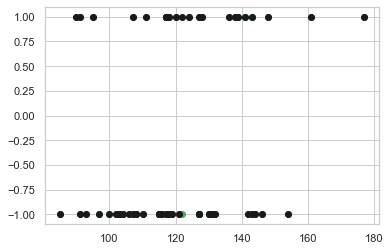

In [29]:
y_pred = svm_.predict(X_test)

plt.scatter(X_test['runtime'], y_test,color='g') 

plt.scatter(X_test['runtime'], y_pred,color='k') 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Implementation using Perceptron algorithm

In [30]:
preceptron = Perceptron(tol=1e-3, random_state=36)
preceptron.fit(X_train, y_train)
preceptron.score(X_test, y_test)

0.631578947368421

Accuracy: 0.631578947368421
Precision: 0.3157894736842105
Recall: 0.5
F1-score: 0.3870967741935484


C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


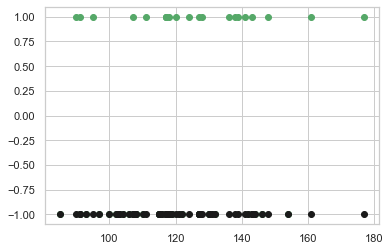

In [31]:
y_pred = preceptron.predict(X_test)

plt.scatter(X_test['runtime'], y_test,color='g') 

plt.scatter(X_test['runtime'], y_pred,color='k') 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# --------------- Try 5 ---------------

Same as implementation number 4 buy only with other features.


In [32]:
movies_v5 = movies.loc[movies.vote_count >= 100, ['runtime', 'popularity', 'vote_average']]
movies_v5

,runtime,popularity,vote_average
0,162.0,150.437577,7.2
1,169.0,139.082615,6.9
2,148.0,107.376788,6.3
3,165.0,112.312950,7.6
4,132.0,43.926995,6.1
...,...,...,...
4773,92.0,19.748658,7.4
4778,85.0,7.101197,6.0
4788,93.0,4.553644,6.2
4796,77.0,23.307949,6.9


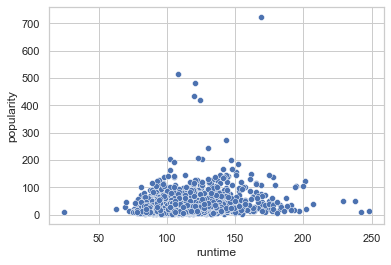

In [33]:
threshold = 7
y = []
for i in movies_v5['vote_average']:
    y.append(1) if i >= threshold else y.append(-1)
    
X_train, X_test, y_train, y_test = train_test_split(movies_v5[['runtime', 'popularity']], y, test_size=0.1, random_state=0)

sns.scatterplot(data=X_train, x='runtime', y='popularity')

plt.show()

***Using SVM***

In [34]:
# svm_ = svm.SVC(kernel='linear', C=1, random_state=0) # random_state=42 gives us a very good results
svm_ = svm.SVC(C=1, random_state=42)
svm_.fit(X_train, y_train)
svm_.score(X_test, y_test)

0.832807570977918

Accuracy: 0.832807570977918
Precision: 0.7632462027552102
Recall: 0.5966601815823606
F1-score: 0.6168092142775686


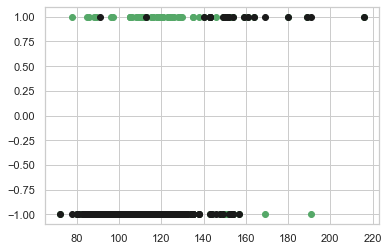

In [35]:
y_pred = svm_.predict(X_test)

plt.scatter(X_test['runtime'], y_test,color='g') 

plt.scatter(X_test['runtime'], y_pred,color='k') 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

***Using Perceptron***

In [38]:
preceptron = Perceptron(tol=1e-3, random_state=0)
preceptron.fit(X_train, y_train)
preceptron.score(X_test, y_test)

0.804416403785489

Accuracy: 0.804416403785489
Precision: 0.5952669902912622
Recall: 0.515272373540856
F1-score: 0.4893473290376221


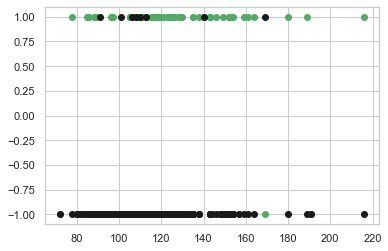

In [39]:
y_pred = preceptron.predict(X_test)

plt.scatter(X_test['runtime'], y_test,color='g') 

plt.scatter(X_test['runtime'], y_pred,color='k') 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)